# Student marks prediction 

## Data Explolration and Analysis

### import the required packages for working with the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
#sns.set(color_codes=True)
%matplotlib inline

#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, 
#next to the code,within frontends like the Jupyter notebook

### Loading the maths and the portugese dataset into the data frames using pandas

In [2]:
math_df=pd.read_csv('student-mat.csv', sep=";")

In [3]:
math_df.head()

#Showing the top 5 from maths dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
por_df=pd.read_csv('student-por.csv', sep=";")

In [5]:
por_df.head()

#Showing the top 5 from portugese dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


###  Few Function describing the data frame for both the maths and portugese data set

In [6]:
math_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
por_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [8]:
math_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [9]:
por_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [10]:
math_df.groupby('school')

In [11]:
math_df.groupby('school').size()

school
GP    349
MS     46
dtype: int64

In [12]:
por_df.groupby('school').size()

school
GP    423
MS    226
dtype: int64

In [13]:
math_df.groupby('famsize').size()

famsize
GT3    281
LE3    114
dtype: int64

In [14]:
por_df.groupby('famsize').size()

famsize
GT3    457
LE3    192
dtype: int64

In [15]:
math_df.groupby('traveltime').size()

traveltime
1    257
2    107
3     23
4      8
dtype: int64

In [16]:
por_df.groupby('traveltime').size()

traveltime
1    366
2    213
3     54
4     16
dtype: int64

In [17]:
math_df.groupby('sex').size()

sex
F    208
M    187
dtype: int64

In [18]:
por_df.groupby('sex').size()

sex
F    383
M    266
dtype: int64

In [19]:
math_df.columns[0:32]

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

| Code   | Description   |
|:---|:---|
|**school** | student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira) |
|**sex**  | student's sex (binary: "F" - female or "M" - male) | 
|**age**  | student's age (numeric: from 15 to 22) | 
|**address**  | student's home address type (binary: "U" - urban or "R" - rural) | 
|**famsize**  | family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3) | 
|**Pstatus**  | parent's cohabitation status (binary: "T" - living together or "A" - apart) | 
|**Medu**  | mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) | 
|**Fedu**  | father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) | 
|**Mjob**  | mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other") | 
|**Fjob**  | father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other") | 
|**reason**  | reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other") | 
|**guardian**  | student's guardian (nominal: "mother", "father" or "other") | 
|**traveltime**  | home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) | 
|**studytime**  | weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) | 
|**failures**  | number of past class failures (numeric: n if 1<=n<3, else 4) | 
|**schoolsup**  | extra educational support (binary: yes or no)| 
|**famsup**  | family educational support (binary: yes or no) | 
|**paid**  | extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) | 
|**activities**  | extra-curricular activities (binary: yes or no) | 
|**nursery**  | attended nursery school (binary: yes or no) | 
|**higher**  | wants to take higher education (binary: yes or no) | 
|**internet**  | Internet access at home (binary: yes or no) | 
|**romantic**  | with a romantic relationship (binary: yes or no) | 
|**famrel**  | quality of family relationships (numeric: from 1 - very bad to 5 - excellent) | 
|**freetime**  | free time after school (numeric: from 1 - very low to 5 - very high) | 
|**goout**  | going out with friends (numeric: from 1 - very low to 5 - very high) | 
|**Dalc**  | workday alcohol consumption (numeric: from 1 - very low to 5 - very high) | 
|**Walc**  | weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) | 
|**health**  | current health status (numeric: from 1 - very bad to 5 - very good) | 
|**absences**  | number of school absences (numeric: from 0 to 93) | 
|**G1**  | first period grade (numeric: from 0 to 20) |
|**G2**  | second period grade (numeric: from 0 to 20) |
|**G3**  | final grade (numeric: from 0 to 20, output target) |

# Using Label Encoder to convert the object / string attributes to numeric

In [20]:
le = preprocessing.LabelEncoder()

# Encode labels in column 'sex'.
math_df ['sex']= le.fit_transform(math_df['sex'])

#address
math_df ['address']= le.fit_transform(math_df['address'])

#famsize
math_df ['famsize']= le.fit_transform(math_df['famsize'])

#Pstatus
math_df ['Pstatus']= le.fit_transform(math_df['Pstatus'])

#Mjob
math_df ['Mjob']= le.fit_transform(math_df['Mjob'])

#Fjob
math_df ['Fjob']= le.fit_transform(math_df['Fjob'])

#reason
math_df ['reason']= le.fit_transform(math_df['reason'])

#guardian
math_df ['guardian']= le.fit_transform(math_df['guardian'])

#schoolsup
math_df ['schoolsup']= le.fit_transform(math_df['schoolsup'])

#famsup
math_df ['famsup']= le.fit_transform(math_df['famsup'])

#paid
math_df ['paid']= le.fit_transform(math_df['paid'])

#activities
math_df ['activities']= le.fit_transform(math_df['activities'])

#nursery
math_df ['nursery']= le.fit_transform(math_df['nursery'])

#higher
math_df ['higher']= le.fit_transform(math_df['higher'])

#internet
math_df ['internet']= le.fit_transform(math_df['internet'])

#romantic
math_df ['romantic']= le.fit_transform(math_df['romantic'])

#school
math_df ['school']= le.fit_transform(math_df['school'])


In [21]:
le = preprocessing.LabelEncoder()

# Encode labels in column 'sex'.
por_df ['sex']= le.fit_transform(por_df['sex'])

#address
por_df ['address']= le.fit_transform(por_df['address'])

#famsize
por_df ['famsize']= le.fit_transform(por_df['famsize'])

#Pstatus
por_df ['Pstatus']= le.fit_transform(por_df['Pstatus'])

#Mjob
por_df ['Mjob']= le.fit_transform(por_df['Mjob'])

#Fjob
por_df ['Fjob']= le.fit_transform(por_df['Fjob'])

#reason
por_df ['reason']= le.fit_transform(por_df['reason'])

#guardian
por_df ['guardian']= le.fit_transform(por_df['guardian'])

#schoolsup
por_df ['schoolsup']= le.fit_transform(por_df['schoolsup'])

#famsup
por_df ['famsup']= le.fit_transform(por_df['famsup'])

#paid
por_df ['paid']= le.fit_transform(por_df['paid'])

#activities
por_df ['activities']= le.fit_transform(por_df['activities'])

#nursery
por_df ['nursery']= le.fit_transform(por_df['nursery'])

#higher
por_df ['higher']= le.fit_transform(por_df['higher'])

#internet
por_df ['internet']= le.fit_transform(por_df['internet'])

#romantic
por_df ['romantic']= le.fit_transform(por_df['romantic'])

#school
por_df ['school']= le.fit_transform(por_df['school'])


In [22]:
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [23]:
por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


In [24]:
math_df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [25]:
math_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null int32
sex           395 non-null int32
age           395 non-null int64
address       395 non-null int32
famsize       395 non-null int32
Pstatus       395 non-null int32
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int32
Fjob          395 non-null int32
reason        395 non-null int32
guardian      395 non-null int32
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null int32
famsup        395 non-null int32
paid          395 non-null int32
activities    395 non-null int32
nursery       395 non-null int32
higher        395 non-null int32
internet      395 non-null int32
romantic      395 non-null int32
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 non-null int64
Walc

In [26]:
math_df.groupby('school').size()

school
0    349
1     46
dtype: int64

In [27]:
math_df.groupby('famsize').size()

famsize
0    281
1    114
dtype: int64

In [28]:
math_df.groupby('sex').size()

sex
0    208
1    187
dtype: int64

In [29]:
por_df.groupby('sex').size()

sex
0    383
1    266
dtype: int64

# Visualization

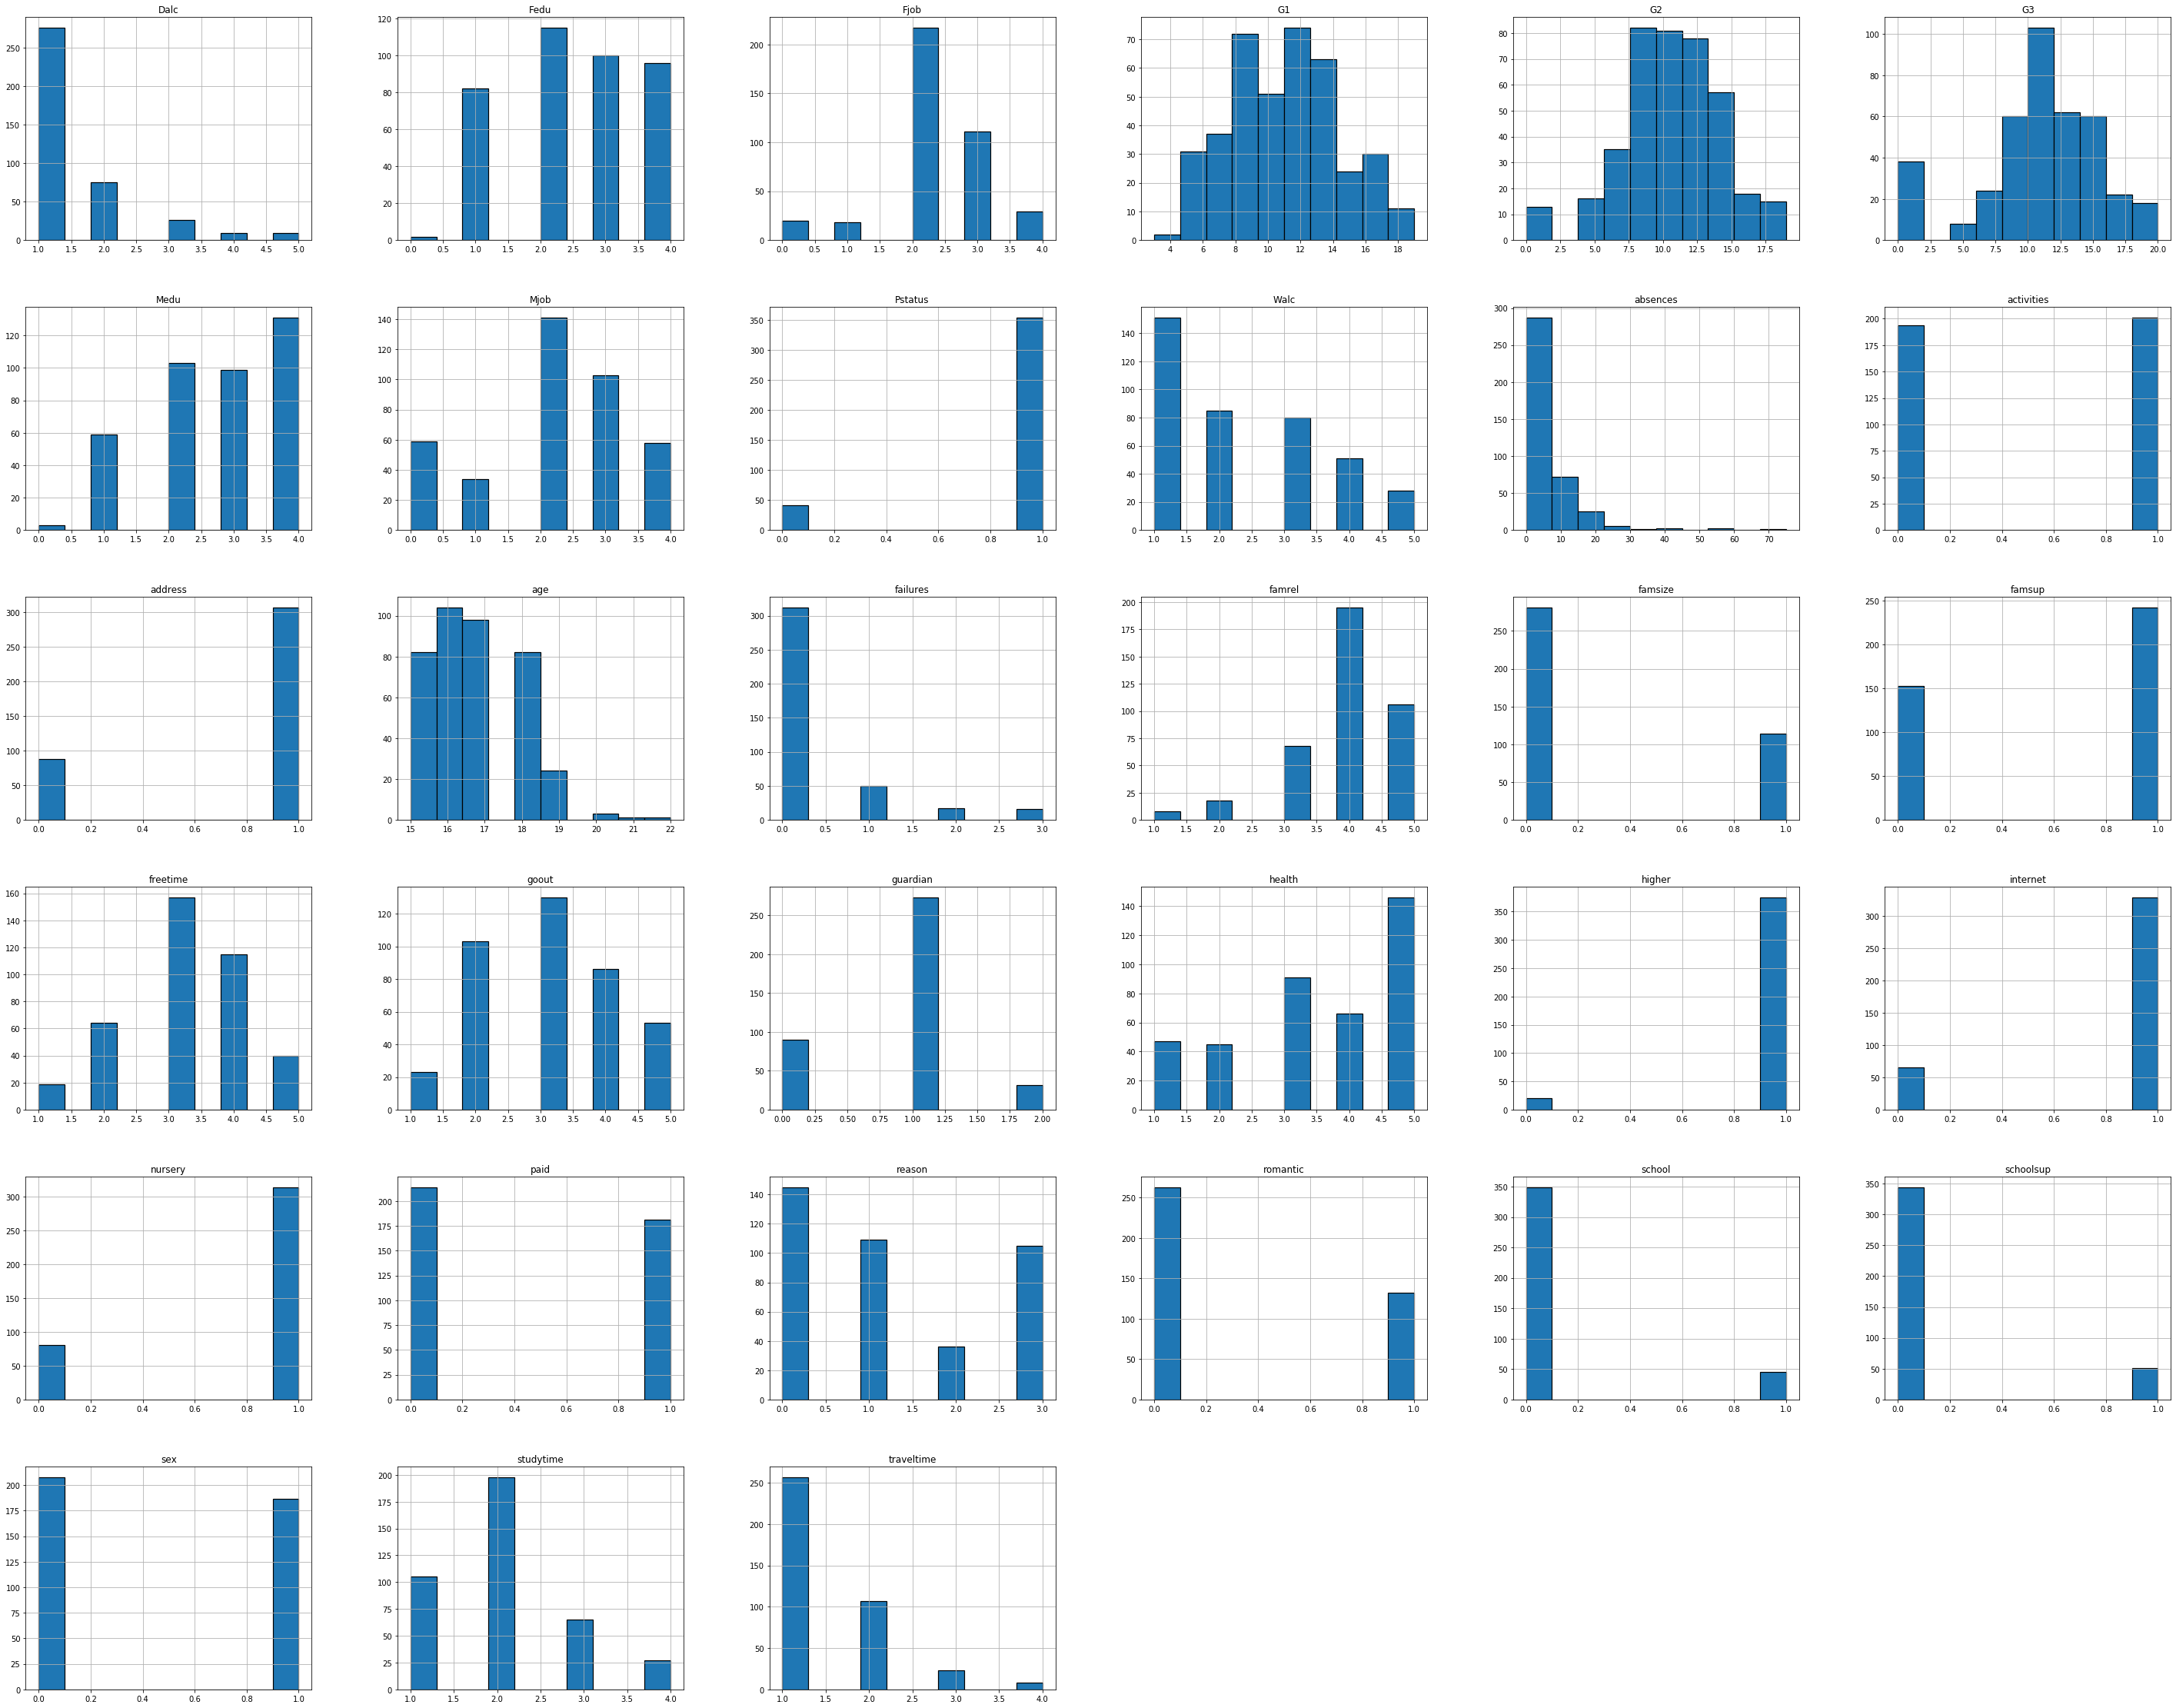

In [30]:
math_df.hist(edgecolor='black',linewidth=1.2,figsize=(50,40));

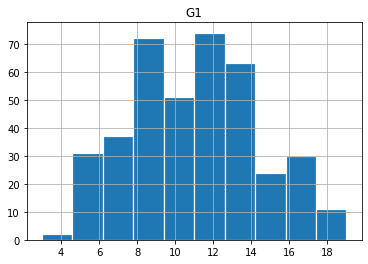

In [31]:
math_df.hist(column='G1',edgecolor='white',linewidth=1.2);

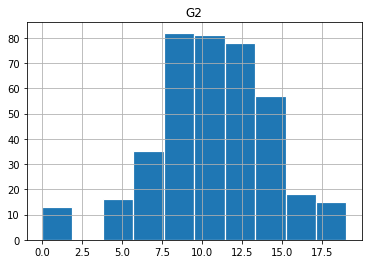

In [32]:
math_df.hist(column='G2',edgecolor='white',linewidth=1.2);

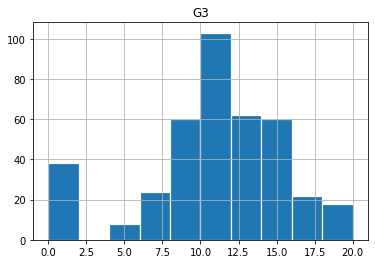

In [33]:
math_df.hist(column='G3',edgecolor='white',linewidth=1.2);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006EC3EBA2C8>,
      dtype=object)

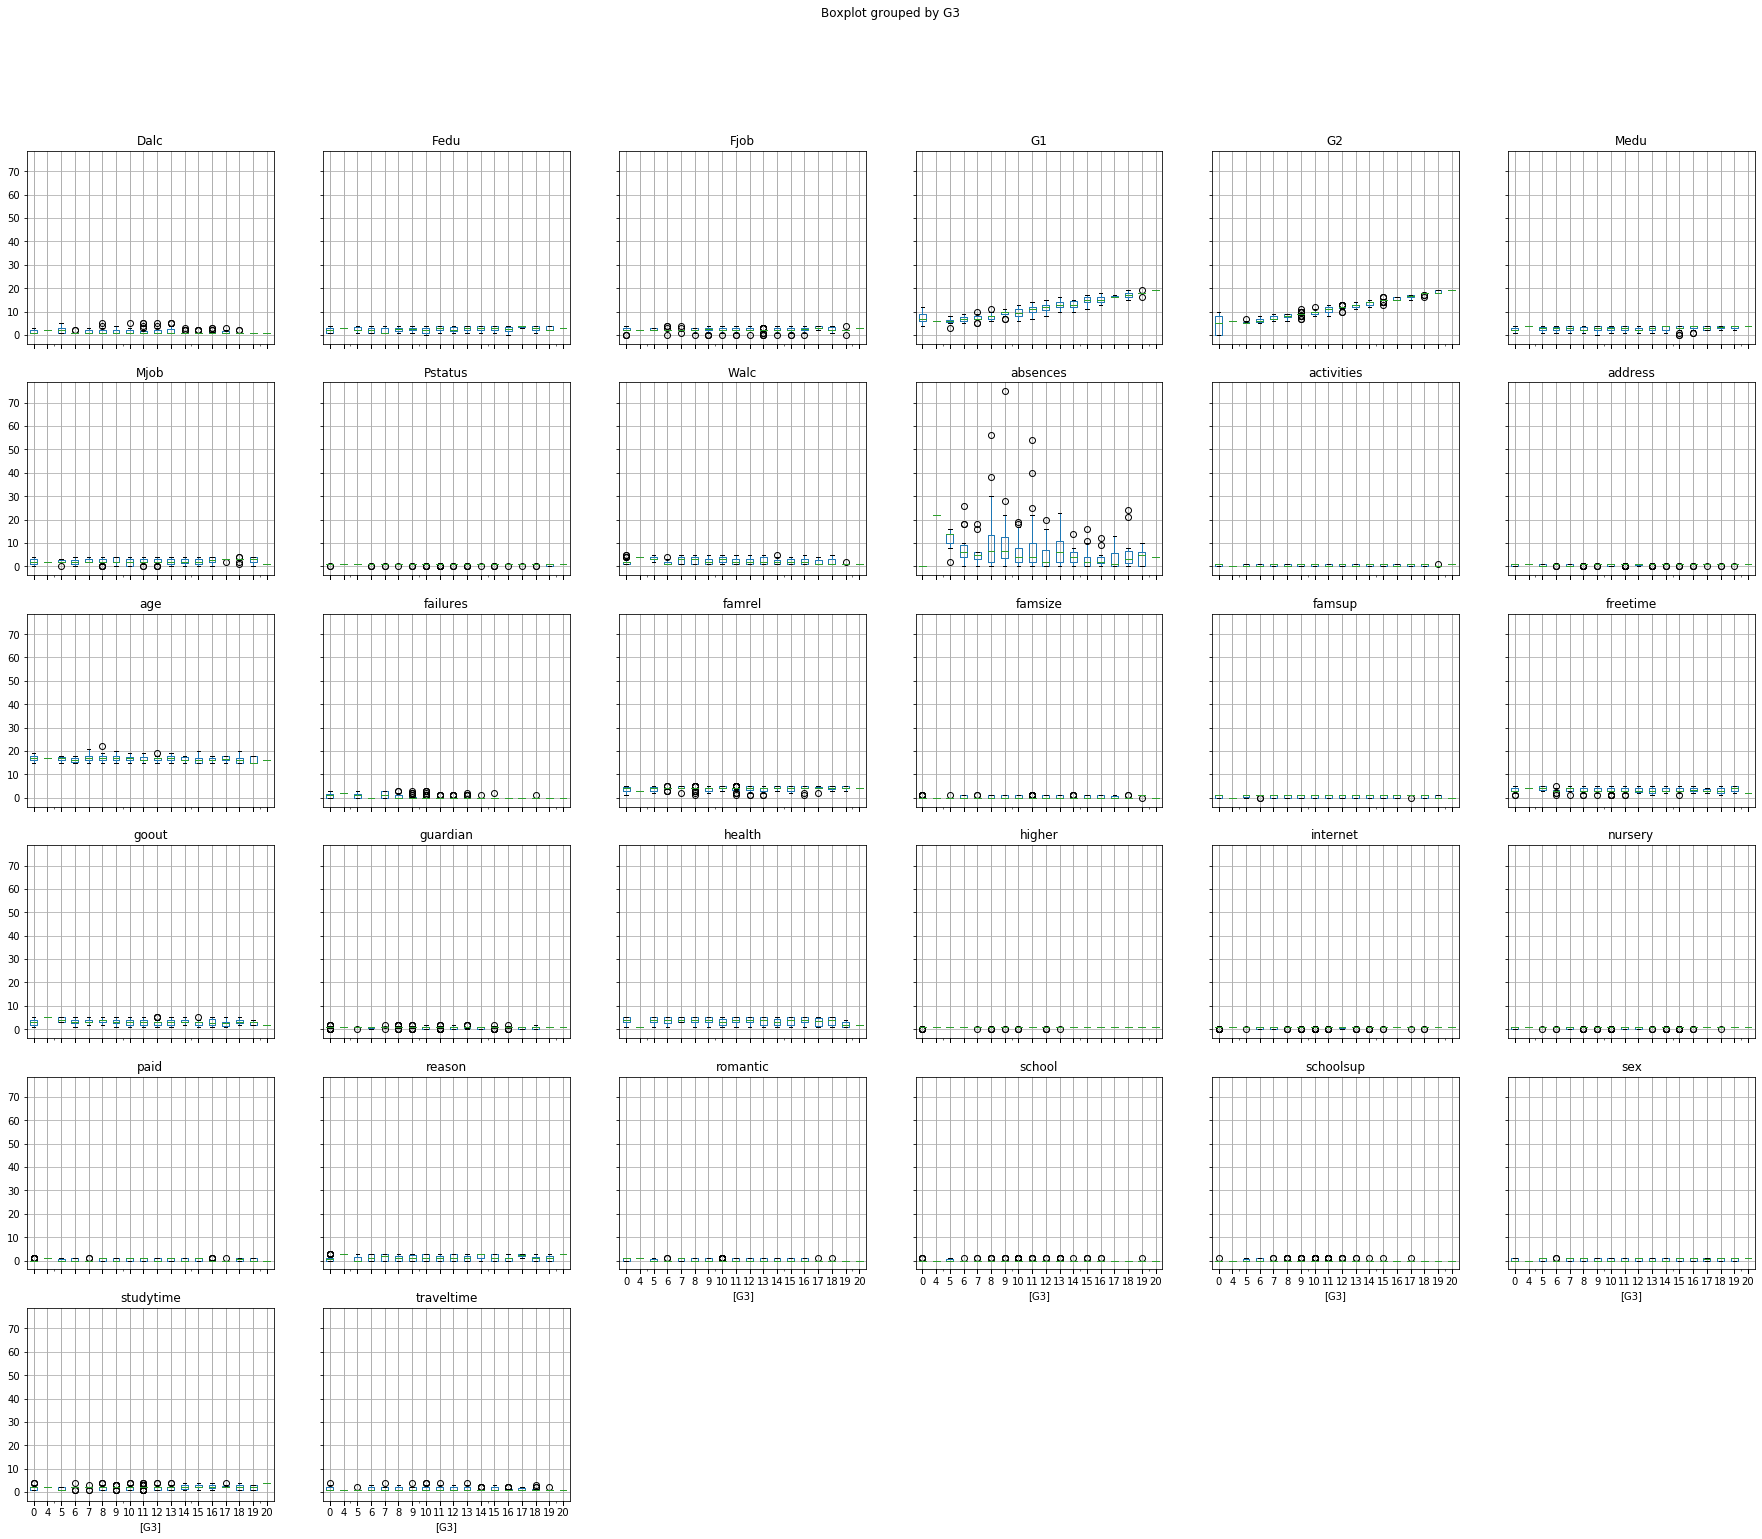

In [34]:
math_df.boxplot(by='G3',figsize=(30,25))

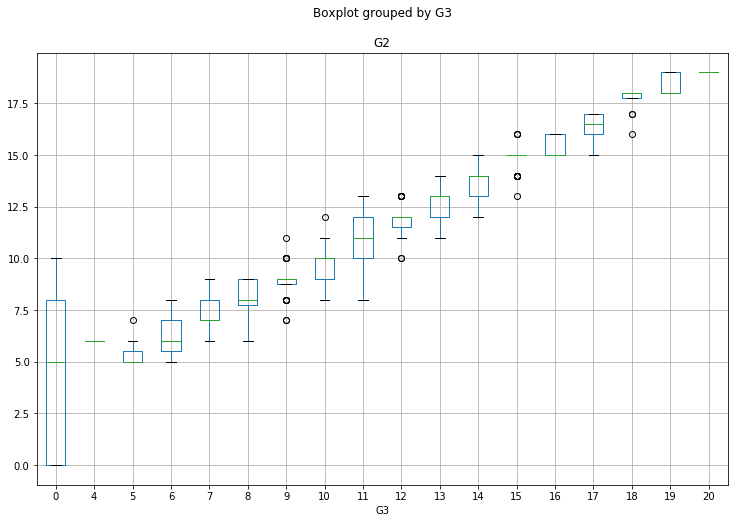

In [35]:
math_df.boxplot(by='G3',figsize=(12,8),column='G2')

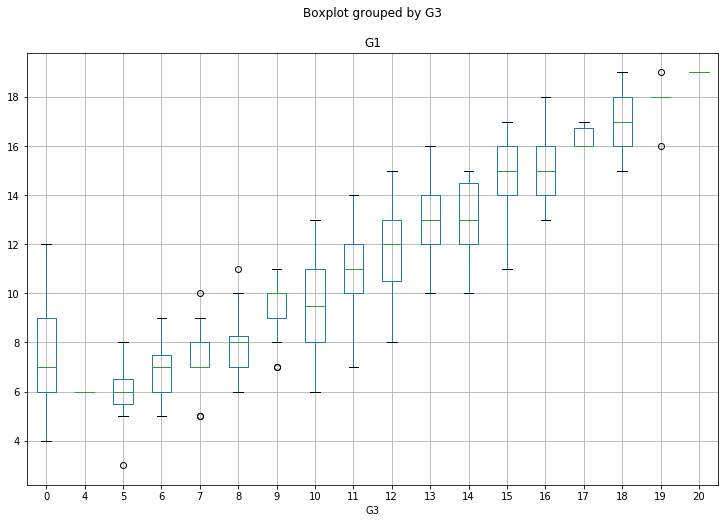

In [36]:
math_df.boxplot(by='G3',figsize=(12,8),column='G1')

In [37]:
pd.options.display.float_format='{:,.3f}'.format

In [38]:
corrMat_maths = math_df.corr()

#creating the correlational matrix

In [39]:
corrMat_maths

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000,-0.012,0.378,-0.280,0.065,0.046,-0.133,-0.080,-0.057,0.019,...,-0.048,0.033,-0.007,0.114,0.065,-0.043,-0.088,-0.026,-0.050,-0.045
sex,-0.012,1.000,-0.029,-0.029,0.090,0.023,0.078,0.035,0.191,0.085,...,0.059,0.239,0.076,0.268,0.274,0.144,-0.067,0.092,0.091,0.103
age,0.378,-0.029,1.000,-0.147,0.038,0.030,-0.164,-0.163,-0.069,-0.035,...,0.054,0.016,0.127,0.131,0.117,-0.062,0.175,-0.064,-0.143,-0.162
address,-0.280,-0.029,-0.147,1.000,0.072,-0.043,0.139,0.072,0.109,-0.002,...,0.014,0.035,0.069,-0.093,-0.101,-0.040,-0.028,0.070,0.126,0.106
famsize,0.065,0.090,0.038,0.072,1.000,-0.150,-0.043,-0.059,0.071,-0.084,...,-0.023,0.018,0.023,0.102,0.103,-0.029,0.036,0.071,0.081,0.081
Pstatus,0.046,0.023,0.030,-0.043,-0.150,1.000,-0.124,-0.089,-0.054,0.034,...,0.025,0.039,0.003,-0.031,0.006,0.022,-0.135,-0.017,-0.041,-0.058
Medu,-0.133,0.078,-0.164,0.139,-0.043,-0.124,1.000,0.623,0.455,0.158,...,-0.004,0.031,0.064,0.020,-0.047,-0.047,0.100,0.205,0.216,0.217
Fedu,-0.080,0.035,-0.163,0.072,-0.059,-0.089,0.623,1.000,0.243,0.200,...,-0.001,-0.013,0.043,0.002,-0.013,0.015,0.024,0.190,0.165,0.152
Mjob,-0.057,0.191,-0.069,0.109,0.071,-0.054,0.455,0.243,1.000,0.197,...,0.039,0.114,0.003,0.076,-0.012,0.065,0.050,0.082,0.097,0.102
Fjob,0.019,0.085,-0.035,-0.002,-0.084,0.034,0.158,0.200,0.197,1.000,...,0.014,-0.047,0.010,0.078,0.070,-0.018,0.008,0.058,0.067,0.042


In [40]:
np.fill_diagonal(corrMat_maths.values, np.nan)
 #clearing the diagonal of the matrix

In [41]:
corrMat_maths

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,nan,-0.012,0.378,-0.280,0.065,0.046,-0.133,-0.080,-0.057,0.019,...,-0.048,0.033,-0.007,0.114,0.065,-0.043,-0.088,-0.026,-0.050,-0.045
sex,-0.012,nan,-0.029,-0.029,0.090,0.023,0.078,0.035,0.191,0.085,...,0.059,0.239,0.076,0.268,0.274,0.144,-0.067,0.092,0.091,0.103
age,0.378,-0.029,nan,-0.147,0.038,0.030,-0.164,-0.163,-0.069,-0.035,...,0.054,0.016,0.127,0.131,0.117,-0.062,0.175,-0.064,-0.143,-0.162
address,-0.280,-0.029,-0.147,nan,0.072,-0.043,0.139,0.072,0.109,-0.002,...,0.014,0.035,0.069,-0.093,-0.101,-0.040,-0.028,0.070,0.126,0.106
famsize,0.065,0.090,0.038,0.072,nan,-0.150,-0.043,-0.059,0.071,-0.084,...,-0.023,0.018,0.023,0.102,0.103,-0.029,0.036,0.071,0.081,0.081
Pstatus,0.046,0.023,0.030,-0.043,-0.150,nan,-0.124,-0.089,-0.054,0.034,...,0.025,0.039,0.003,-0.031,0.006,0.022,-0.135,-0.017,-0.041,-0.058
Medu,-0.133,0.078,-0.164,0.139,-0.043,-0.124,nan,0.623,0.455,0.158,...,-0.004,0.031,0.064,0.020,-0.047,-0.047,0.100,0.205,0.216,0.217
Fedu,-0.080,0.035,-0.163,0.072,-0.059,-0.089,0.623,nan,0.243,0.200,...,-0.001,-0.013,0.043,0.002,-0.013,0.015,0.024,0.190,0.165,0.152
Mjob,-0.057,0.191,-0.069,0.109,0.071,-0.054,0.455,0.243,nan,0.197,...,0.039,0.114,0.003,0.076,-0.012,0.065,0.050,0.082,0.097,0.102
Fjob,0.019,0.085,-0.035,-0.002,-0.084,0.034,0.158,0.200,0.197,nan,...,0.014,-0.047,0.010,0.078,0.070,-0.018,0.008,0.058,0.067,0.042


In [42]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMat_maths, dtype=np.bool)



In [43]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [44]:
mask[np.triu_indices_from(mask)] = True

In [45]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

In [46]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

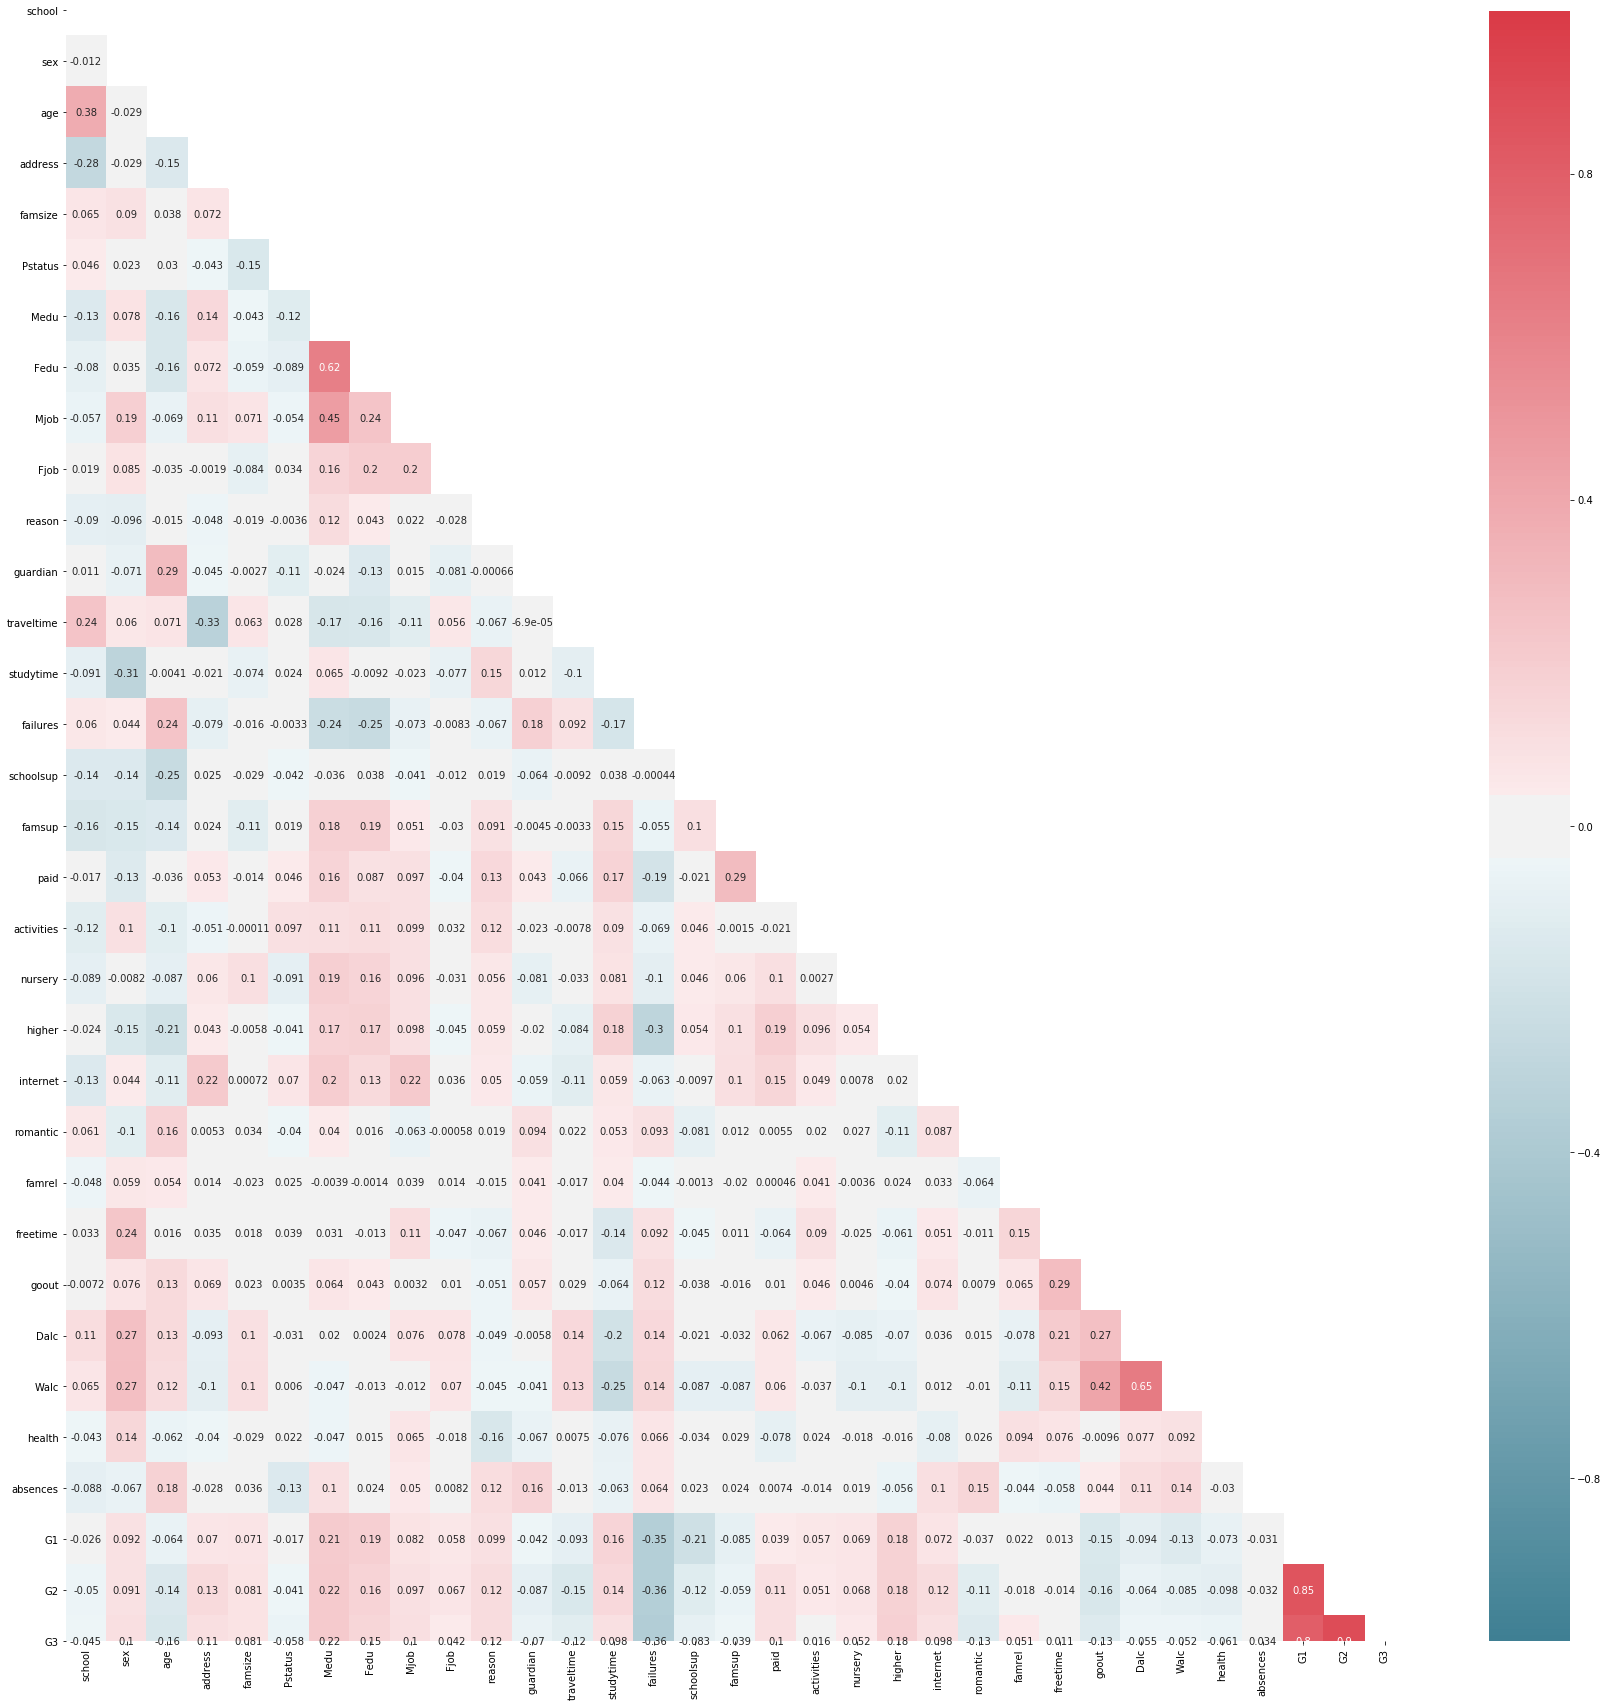

In [47]:
# Set up the matplotlib figure

plt.figure(figsize=(30,30));

#Heatmap

sns.heatmap(math_df[math_df.columns].corr(),mask=mask,vmin=-1,annot=True, vmax=1 ,center=0,cmap=cmap)


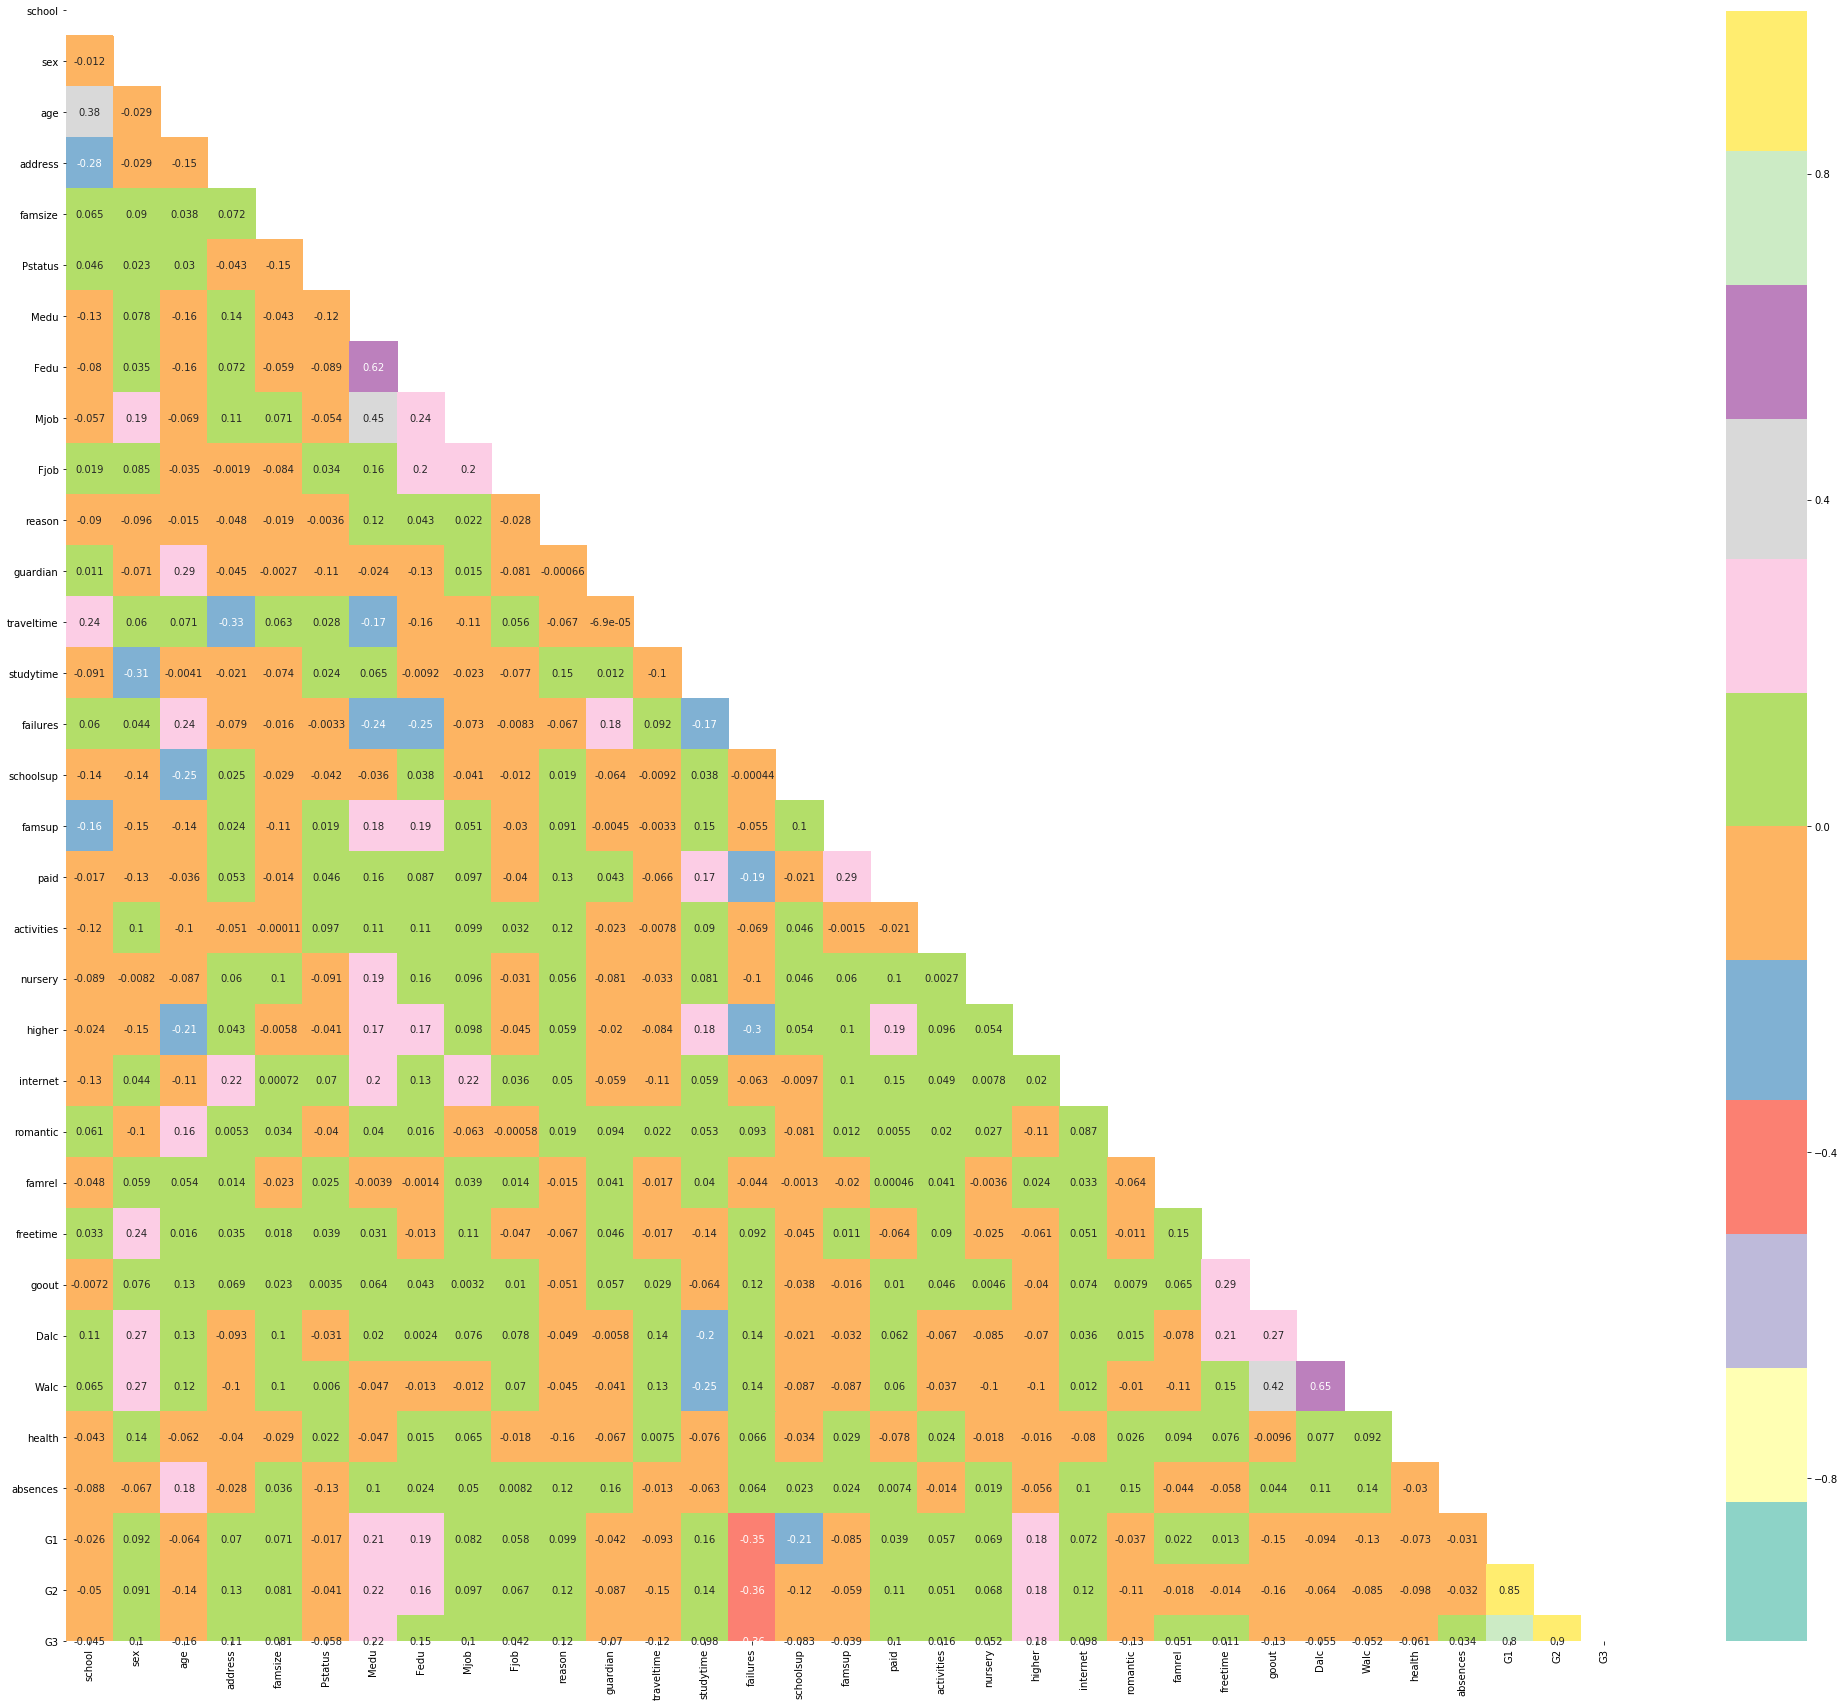

In [48]:
plt.figure(figsize=(35,30));
sns.heatmap(math_df[math_df.columns].corr(),mask=mask,vmin=-1,annot=True, vmax=1 ,center=0,cmap="Set3")

# Simple Linear Regression uisng Scikit Learn (maths data 

## G2 vs G3 model

In [49]:
math_df['G2']

0       6
1       5
2       8
3      14
4      10
       ..
390     9
391    16
392     8
393    12
394     9
Name: G2, Length: 395, dtype: int64

In [50]:
g2=math_df['G2']

In [51]:
g2

0       6
1       5
2       8
3      14
4      10
       ..
390     9
391    16
392     8
393    12
394     9
Name: G2, Length: 395, dtype: int64

In [52]:
g2.shape

(395,)

In [53]:
g3=math_df['G3']

In [54]:
g3

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [55]:
sex=math_df['sex']

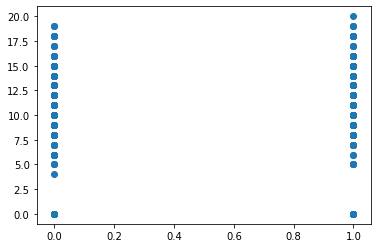

In [56]:
plt.scatter(sex,g3)

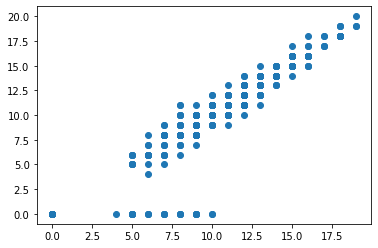

In [57]:
plt.scatter(g2,g3)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model=LinearRegression()

In [60]:
g2=math_df['G2'].values

In [61]:
g2

array([ 6,  5,  8, 14, 10, 15, 12,  5, 18, 15,  8, 12, 14, 10, 16, 14, 14,
       10,  5, 10, 14, 15, 15, 13,  9,  9, 12, 16, 11, 12, 11, 16, 16, 10,
       14,  7, 16, 16, 12, 13, 10, 12, 18,  8, 10,  8, 12, 19, 15,  7, 13,
       13, 11, 10, 13,  9, 15, 15, 10, 16, 11,  8, 10,  9, 10, 15, 13,  7,
        9, 16, 15, 10,  6, 12, 12,  9, 11, 11,  8,  5, 12, 10,  6, 15, 10,
        9,  7, 14, 10,  6,  7, 17,  6, 10, 13, 10, 15,  9, 14,  9,  7, 17,
       13,  6, 18, 11,  8, 18, 13, 15, 19, 10, 13, 19,  9, 15, 13, 14,  7,
       13, 15, 14, 13, 11,  7, 13, 10,  8,  4, 18,  0,  0, 13, 11,  0,  0,
        0,  0, 12, 16,  9,  9, 11, 14,  0, 11,  7, 11,  6,  9,  5, 13, 10,
        0, 11,  8, 12,  8, 15, 12,  6,  9,  0, 10,  8, 11, 10, 15,  7, 14,
        5, 15, 11,  7, 11,  9, 13,  5,  8, 10,  8, 13, 17,  9, 13, 12, 12,
       15,  7,  9, 12,  8,  8,  9, 14, 15, 15,  9, 18,  9, 16, 10,  9,  6,
       10,  9,  7, 12,  9,  7,  8, 12, 13,  7, 10, 15,  6,  6,  7, 10,  6,
        5, 16, 13, 13,  8

In [62]:
G2=g2.reshape(-1,1)

In [63]:
G2

array([[ 6],
       [ 5],
       [ 8],
       [14],
       [10],
       [15],
       [12],
       [ 5],
       [18],
       [15],
       [ 8],
       [12],
       [14],
       [10],
       [16],
       [14],
       [14],
       [10],
       [ 5],
       [10],
       [14],
       [15],
       [15],
       [13],
       [ 9],
       [ 9],
       [12],
       [16],
       [11],
       [12],
       [11],
       [16],
       [16],
       [10],
       [14],
       [ 7],
       [16],
       [16],
       [12],
       [13],
       [10],
       [12],
       [18],
       [ 8],
       [10],
       [ 8],
       [12],
       [19],
       [15],
       [ 7],
       [13],
       [13],
       [11],
       [10],
       [13],
       [ 9],
       [15],
       [15],
       [10],
       [16],
       [11],
       [ 8],
       [10],
       [ 9],
       [10],
       [15],
       [13],
       [ 7],
       [ 9],
       [16],
       [15],
       [10],
       [ 6],
       [12],
       [12],
       [ 9],
       [11],

In [64]:
G2_train=G2[0:300,]

In [65]:
G2_test=G2[301:395]

In [66]:
g3=math_df['G3'].values

In [67]:
g3

array([ 6,  6, 10, 15, 10, 15, 11,  6, 19, 15,  9, 12, 14, 11, 16, 14, 14,
       10,  5, 10, 15, 15, 16, 12,  8,  8, 11, 15, 11, 11, 12, 17, 16, 12,
       15,  6, 18, 15, 11, 13, 11, 12, 18, 11,  9,  6, 11, 20, 14,  7, 13,
       13, 10, 11, 13, 10, 15, 15,  9, 16, 11, 11,  9,  9, 10, 15, 12,  6,
        8, 16, 15, 10,  5, 14, 11, 10, 10, 11, 10,  5, 12, 11,  6, 15, 10,
        8,  6, 14, 10,  7,  8, 18,  6, 10, 14, 10, 15, 10, 14,  8,  5, 17,
       14,  6, 18, 11,  8, 18, 13, 16, 19, 10, 13, 19,  9, 16, 14, 13,  8,
       13, 15, 15, 13, 13,  8, 12, 11,  9,  0, 18,  0,  0, 12, 11,  0,  0,
        0,  0, 12, 15,  0,  9, 11, 13,  0, 11,  0, 11,  0, 10,  0, 14, 10,
        0, 12,  8, 13, 10, 15, 12,  0,  7,  0, 10,  7, 12, 10, 16,  0, 14,
        0, 16, 10,  0,  9,  9, 11,  6,  9, 11,  8, 12, 17,  8, 12, 11, 11,
       15,  9, 10, 13,  9,  8, 10, 14, 15, 16, 10, 18, 10, 16, 10, 10,  6,
       11,  9,  7, 13, 10,  7,  8, 13, 14,  8, 10, 15,  4,  8,  8, 10,  6,
        0, 17, 13, 14,  7

In [68]:
G3=g3.reshape(-1,1)

In [69]:
G3_train=G3[0:300,]

In [70]:
G3_test=G3[301:395]

In [71]:
G3_train.size

300

In [72]:
g3_train=G3_train.ravel()

In [73]:
g3_train.shape

(300,)

In [74]:
g3_train.size

300

In [75]:
model.fit(G2_train,g3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
model.score(G2_train, g3_train)

0.8562953452353544

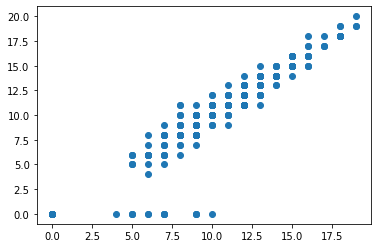

In [77]:
plt.scatter(G2_train,G3_train)

In [78]:
g3_predict=model.predict(G2_test)

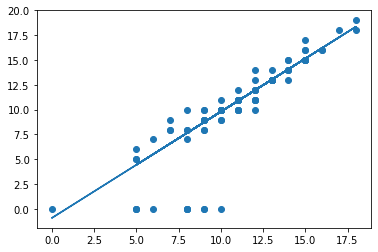

In [79]:
plt.scatter(G2_test,G3_test)
plt.plot(G2_test,g3_predict)

Text(0, 0.5, 'final grade (numeric: from 0 to 20, output target)')

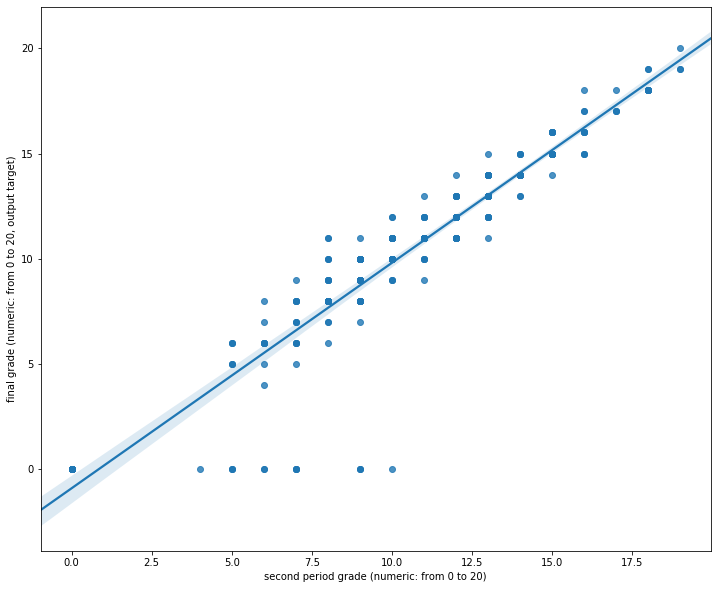

In [80]:
plt.figure(figsize=(12,10))
sns.regplot(G2_train,g3_train)
plt.xlabel('second period grade (numeric: from 0 to 20)')
plt.ylabel('final grade (numeric: from 0 to 20, output target)')

C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


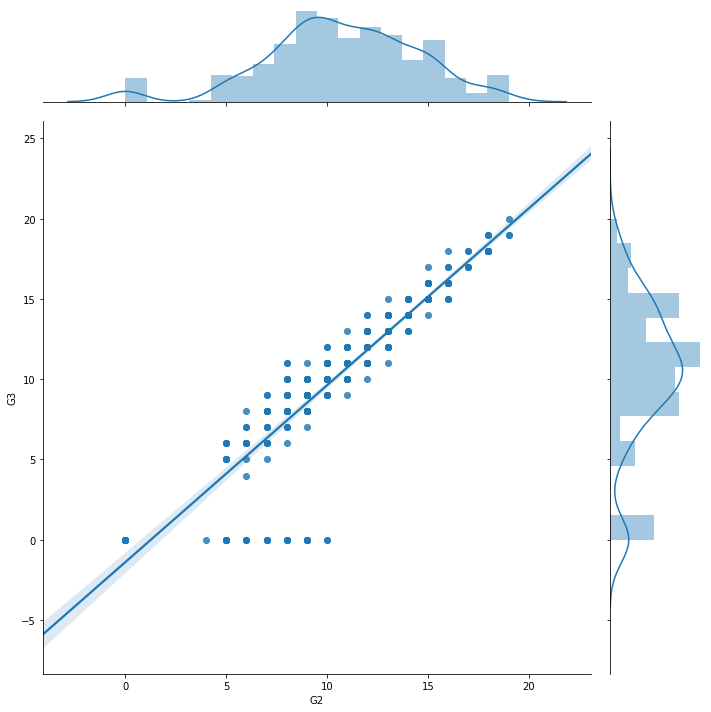

In [81]:
sns.jointplot(x='G2',y='G3',data=math_df,kind='reg',size=10)

## G1 vs G3 model

In [82]:
g1=math_df['G1'].values.reshape(-1,1)

Text(0, 0.5, 'final grade (numeric: from 0 to 20, output target)')

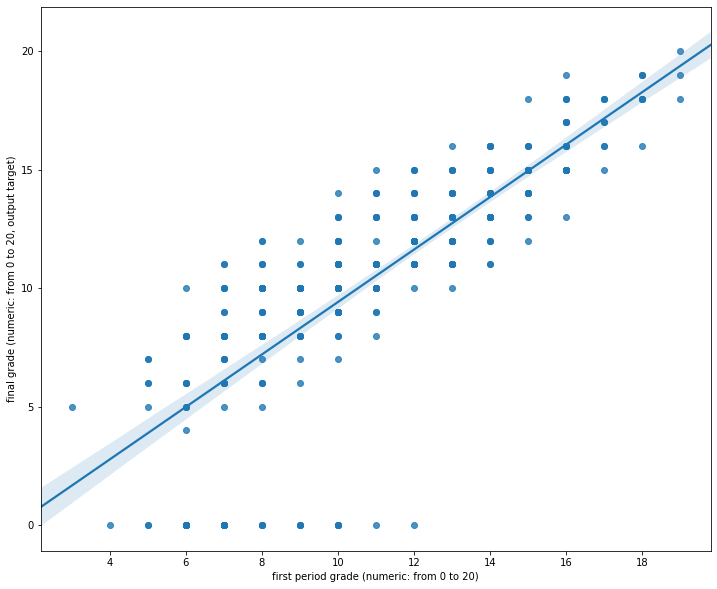

In [83]:
plt.figure(figsize=(12,10))
sns.regplot(g1,g3)
plt.xlabel('first period grade (numeric: from 0 to 20)')
plt.ylabel('final grade (numeric: from 0 to 20, output target)')

Text(63.125, 0.5, 'final grade (numeric: from 0 to 20, output target)')

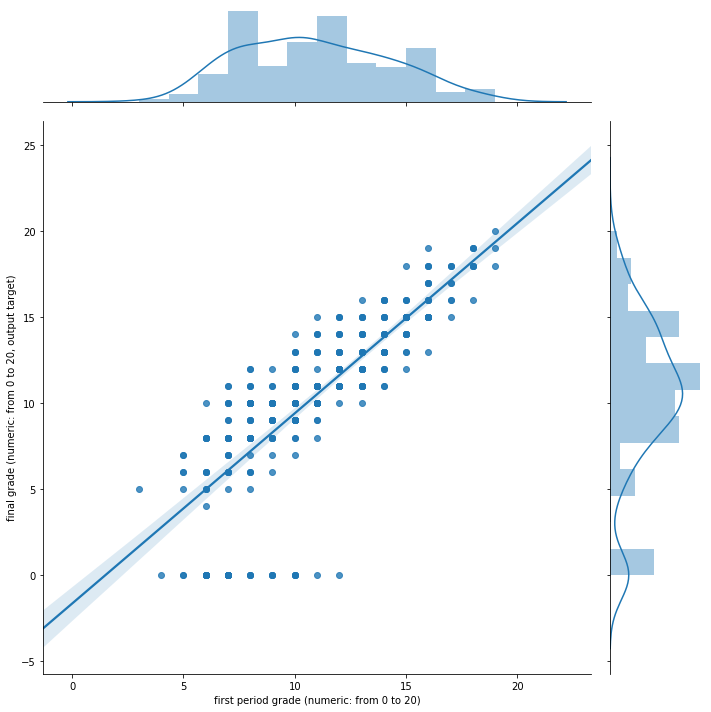

In [84]:
sns.jointplot(x='G1',y='G3',data=math_df,kind='reg',size=10)
plt.xlabel('first period grade (numeric: from 0 to 20)')
plt.ylabel('final grade (numeric: from 0 to 20, output target)')

## failure vs G3 model

In [85]:
failure=math_df['failures'].values.reshape(-1,1)

Text(0, 0.5, 'final grade (numeric: from 0 to 20, output target)')

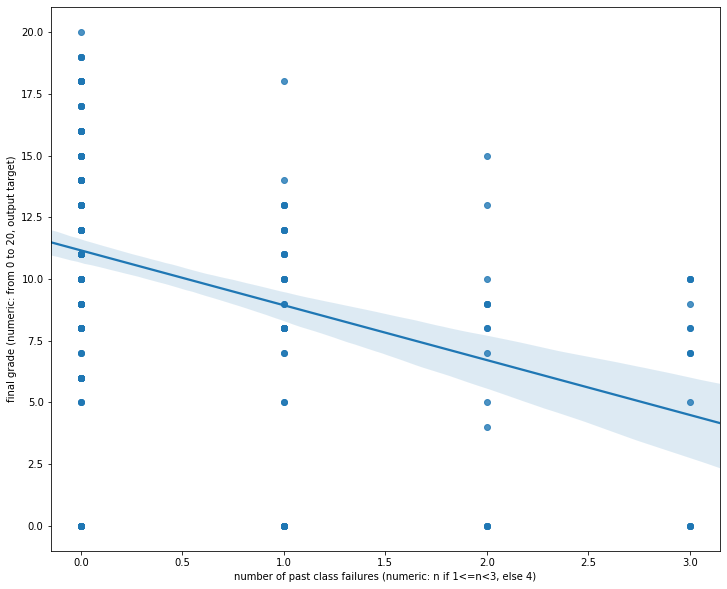

In [86]:
plt.figure(figsize=(12,10))
sns.regplot(failure,g3)
plt.xlabel('number of past class failures (numeric: n if 1<=n<3, else 4)')
plt.ylabel('final grade (numeric: from 0 to 20, output target)')

In [87]:
col_sel=['failures','G3']

In [88]:
math_df[col_sel].values.reshape(-1,2)

array([[ 0,  6],
       [ 0,  6],
       [ 3, 10],
       [ 0, 15],
       [ 0, 10],
       [ 0, 15],
       [ 0, 11],
       [ 0,  6],
       [ 0, 19],
       [ 0, 15],
       [ 0,  9],
       [ 0, 12],
       [ 0, 14],
       [ 0, 11],
       [ 0, 16],
       [ 0, 14],
       [ 0, 14],
       [ 0, 10],
       [ 3,  5],
       [ 0, 10],
       [ 0, 15],
       [ 0, 15],
       [ 0, 16],
       [ 0, 12],
       [ 0,  8],
       [ 2,  8],
       [ 0, 11],
       [ 0, 15],
       [ 0, 11],
       [ 0, 11],
       [ 0, 12],
       [ 0, 17],
       [ 0, 16],
       [ 0, 12],
       [ 0, 15],
       [ 0,  6],
       [ 0, 18],
       [ 0, 15],
       [ 0, 11],
       [ 0, 13],
       [ 1, 11],
       [ 0, 12],
       [ 0, 18],
       [ 0, 11],
       [ 1,  9],
       [ 0,  6],
       [ 0, 11],
       [ 0, 20],
       [ 0, 14],
       [ 1,  7],
       [ 0, 13],
       [ 0, 13],
       [ 1, 10],
       [ 0, 11],
       [ 0, 13],
       [ 0, 10],
       [ 0, 15],
       [ 0, 15],
       [ 0,  9

In [89]:
math_df[col_sel]

,failures,G3
0,0,6
1,0,6
2,3,10
3,0,15
4,0,10
...,...,...
390,2,9
391,0,16
392,3,7
393,0,10


Text(63.125, 0.5, 'final grade (numeric: from 0 to 20, output target)')

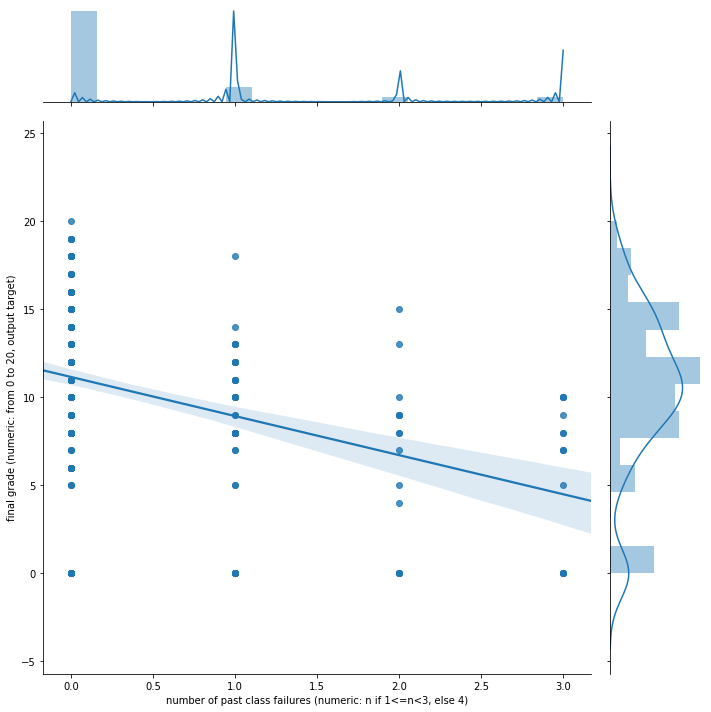

In [90]:
sns.jointplot(x='failures',y='G3',data=math_df,kind='reg',size=10)
plt.xlabel('number of past class failures (numeric: n if 1<=n<3, else 4)')
plt.ylabel('final grade (numeric: from 0 to 20, output target)')


# Robust Regression

## RANdom SAmple Consensus (RANSAC) Algorithm

In [91]:
from sklearn.linear_model import RANSACRegressor

In [92]:
model_ransac=RANSACRegressor()

## G1 vs G3

In [93]:
model_ransac.fit(g1,g3)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [94]:
inlier_mask=model_ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

In [95]:
model_ransac.estimator_.coef_

array([0.7965194])

In [96]:
model_ransac.estimator_.intercept_

2.551948356138153

In [97]:
g1_test=np.arange(2,18,1)

In [98]:
G3_predict_ransac=model_ransac.predict(g1_test.reshape(-1,1))

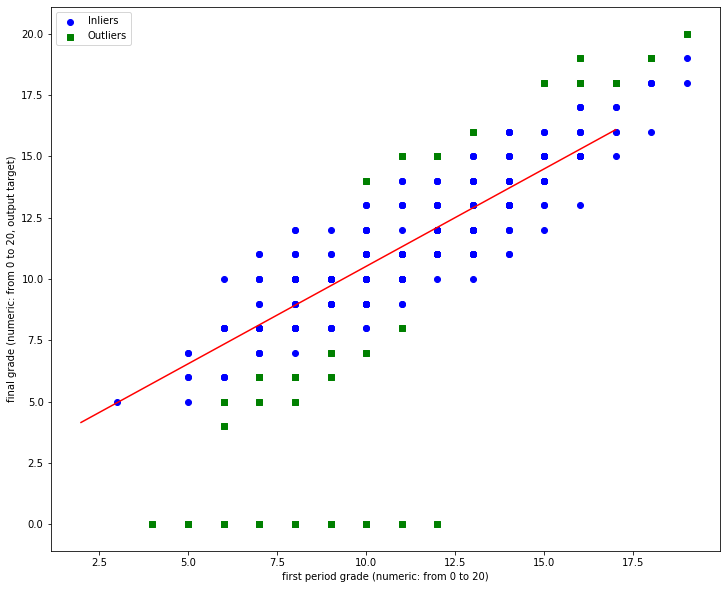

In [99]:
plt.figure(figsize=(12,10))
plt.scatter(g1[inlier_mask],g3[inlier_mask],c='blue',marker='o',label='Inliers')
plt.scatter(g1[outlier_mask],g3[outlier_mask],c='green',marker='s',label='Outliers')
plt.plot(g1_test,G3_predict_ransac,color='red')
plt.xlabel('first period grade (numeric: from 0 to 20)')
plt.ylabel('final grade (numeric: from 0 to 20, output target)')
plt.legend(loc='upper left')

## G2 vs G3

In [100]:
model_ransac.fit(G2,g3)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [101]:
inlier_mask=model_ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

In [102]:
model_ransac.estimator_.coef_

array([0.99923752])

In [103]:
model_ransac.estimator_.intercept_

0.17954564201701118

In [104]:
g2_test=np.arange(2,18,1)

In [105]:
g3_ransac_predict=model_ransac.predict(g2_test.reshape(-1,1))

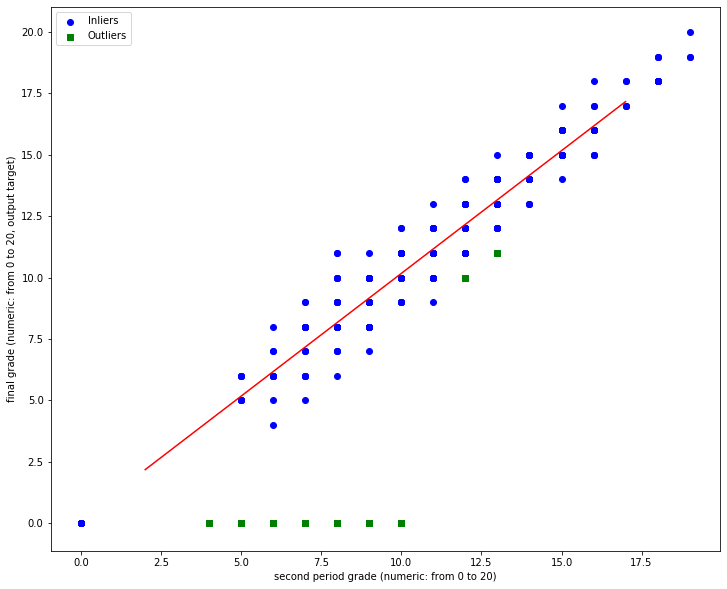

In [106]:
plt.figure(figsize=(12,10))
plt.scatter(g2[inlier_mask],g3[inlier_mask],c='blue',marker='o',label='Inliers')
plt.scatter(g2[outlier_mask],g3[outlier_mask],c='green',marker='s',label='Outliers')
plt.plot(g2_test,g3_ransac_predict,color='red')
plt.xlabel('second period grade (numeric: from 0 to 20)')
plt.ylabel('final grade (numeric: from 0 to 20, output target)')
plt.legend(loc='upper left')

In [107]:
model_ransac.fit(failure,g3)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [108]:
inlier_mask=model_ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

In [109]:
model_ransac.estimator_.coef_

array([-0.99355217])

In [110]:
model_ransac.estimator_.intercept_

10.886943141852285

In [111]:
failure_test=np.arange(0,3,0.5)

In [112]:
g3_ransac_predict=model_ransac.predict(failure_test.reshape(-1,1))

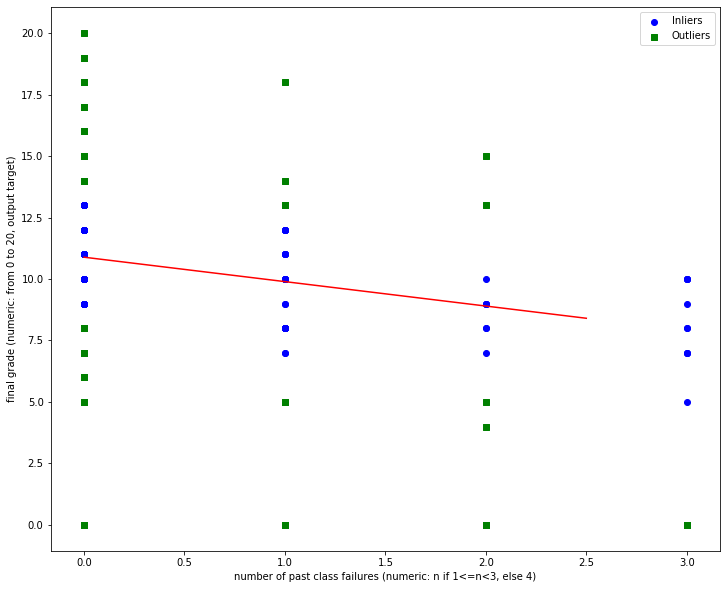

In [113]:
plt.figure(figsize=(12,10))
plt.scatter(failure[inlier_mask],g3[inlier_mask],c='blue',marker='o',label='Inliers')
plt.scatter(failure[outlier_mask],g3[outlier_mask],c='green',marker='s',label='Outliers')
plt.plot(failure_test,g3_ransac_predict,color='red')
plt.xlabel('number of past class failures (numeric: n if 1<=n<3, else 4)')
plt.ylabel('final grade (numeric: from 0 to 20, output target)')
plt.legend(loc='upper right')

# Performance Evaluation of Regression Model

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
#X_train,X_test,y_train,y_test=train_test_split(g2,g3,test_size=0.3,random_state=0)

all=math_df.iloc[:,:-1].values
X_train,X_test,y_train,y_test=train_test_split(all,g3,test_size=0.3,random_state=0)

In [116]:
X_train.shape

(276, 32)

In [117]:
#model.fit(X_train.reshape(-1,1),y_train)

model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
#y_train_pred=model.predict(X_train.reshape(-1,1))

y_train_pred=model.predict(X_train)

In [119]:
#y_test_pred=model.predict(X_test.reshape(-1,1))

y_test_pred=model.predict(X_test)

In [120]:
y_test_pred

array([13.94092646, 11.06192248,  9.05172124, 15.04100618, 16.07049683,
       11.69670405, 13.32718771, 10.37289453,  8.25899953, 14.82193896,
        7.22830434, 14.59920777, 10.90757782,  8.17301187, 15.19500873,
       14.86313317, 12.73594462,  8.46884432,  9.65038758, 14.86373976,
        6.39191003,  3.39769931,  6.36192076, 14.56979891, 11.57880907,
       15.98763511,  9.57900331, 19.7971657 , -0.2372398 , 12.97377379,
       -0.25038749,  7.40276284,  7.54775344,  5.95196823, 13.58061644,
       10.91800724, 13.01377096, 18.69658784,  8.38677605, 11.6894517 ,
        4.46259699, 18.59560603,  7.87010235,  8.17714965,  9.92158211,
       -1.50054142, 11.20474909,  4.32820339, 11.59868979,  6.92468985,
        9.54177043, 18.27430744, 12.86974615,  7.72559493, 12.33462922,
        8.48580143,  9.38936193, 12.3183113 , 15.14881612, 13.8381899 ,
       12.53779254, 13.41531456, 14.15750301, 15.91664636,  7.47709822,
       16.17866924, 18.50908935, 11.63294608,  4.83488593,  8.72

## Method 1: Residual Analysis


### y_train_pred - y_train -> Extra / Residual / Error -->What's Left over after our model is done explaining or has run out of the ability to explain our data

#### It's the difference between the observed value and the predicted vslue
####  y_train--> observed
####  y_train_pred----> predicted

(-10, 12)

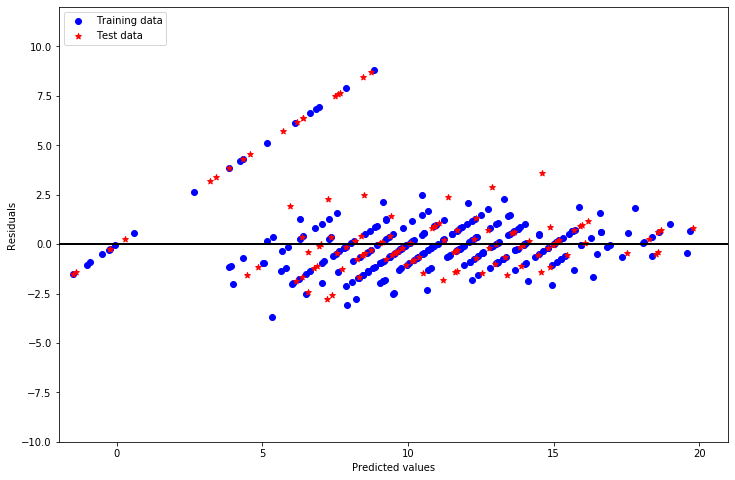

In [121]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred,y_train_pred - y_train, c='blue',marker='o',label='Training data')
plt.scatter(y_test_pred,y_test_pred - y_test, c='red',marker='*',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-2,xmax=25,colors='k',lw=2)
plt.xlim([-2,21])
plt.ylim([-10,12])


# our graph doesn't have constant variance
# its non linear gives us hint that our model is wrong


(-10, 12)

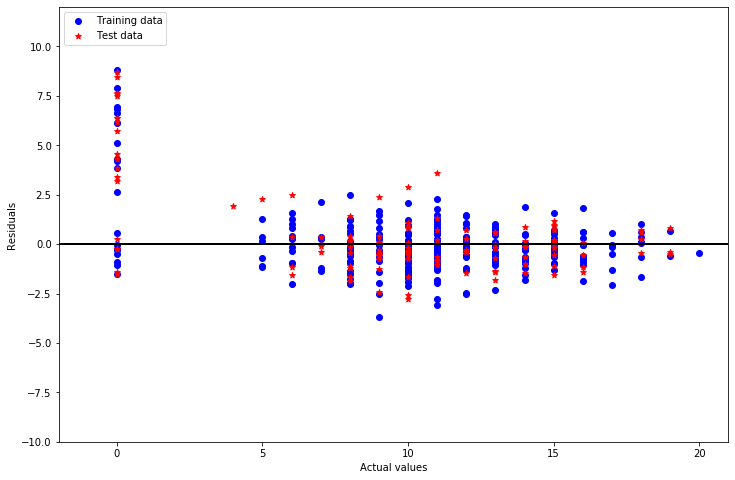

In [122]:
plt.figure(figsize=(12,8))
plt.scatter(y_train,y_train_pred - y_train, c='blue',marker='o',label='Training data')
plt.scatter(y_test,y_test_pred - y_test, c='red',marker='*',label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-2,xmax=25,colors='k',lw=2)
plt.xlim([-2,21])
plt.ylim([-10,12])


# our graph doesn't have constant variance
# its non linear gives us hint that our model is wrong

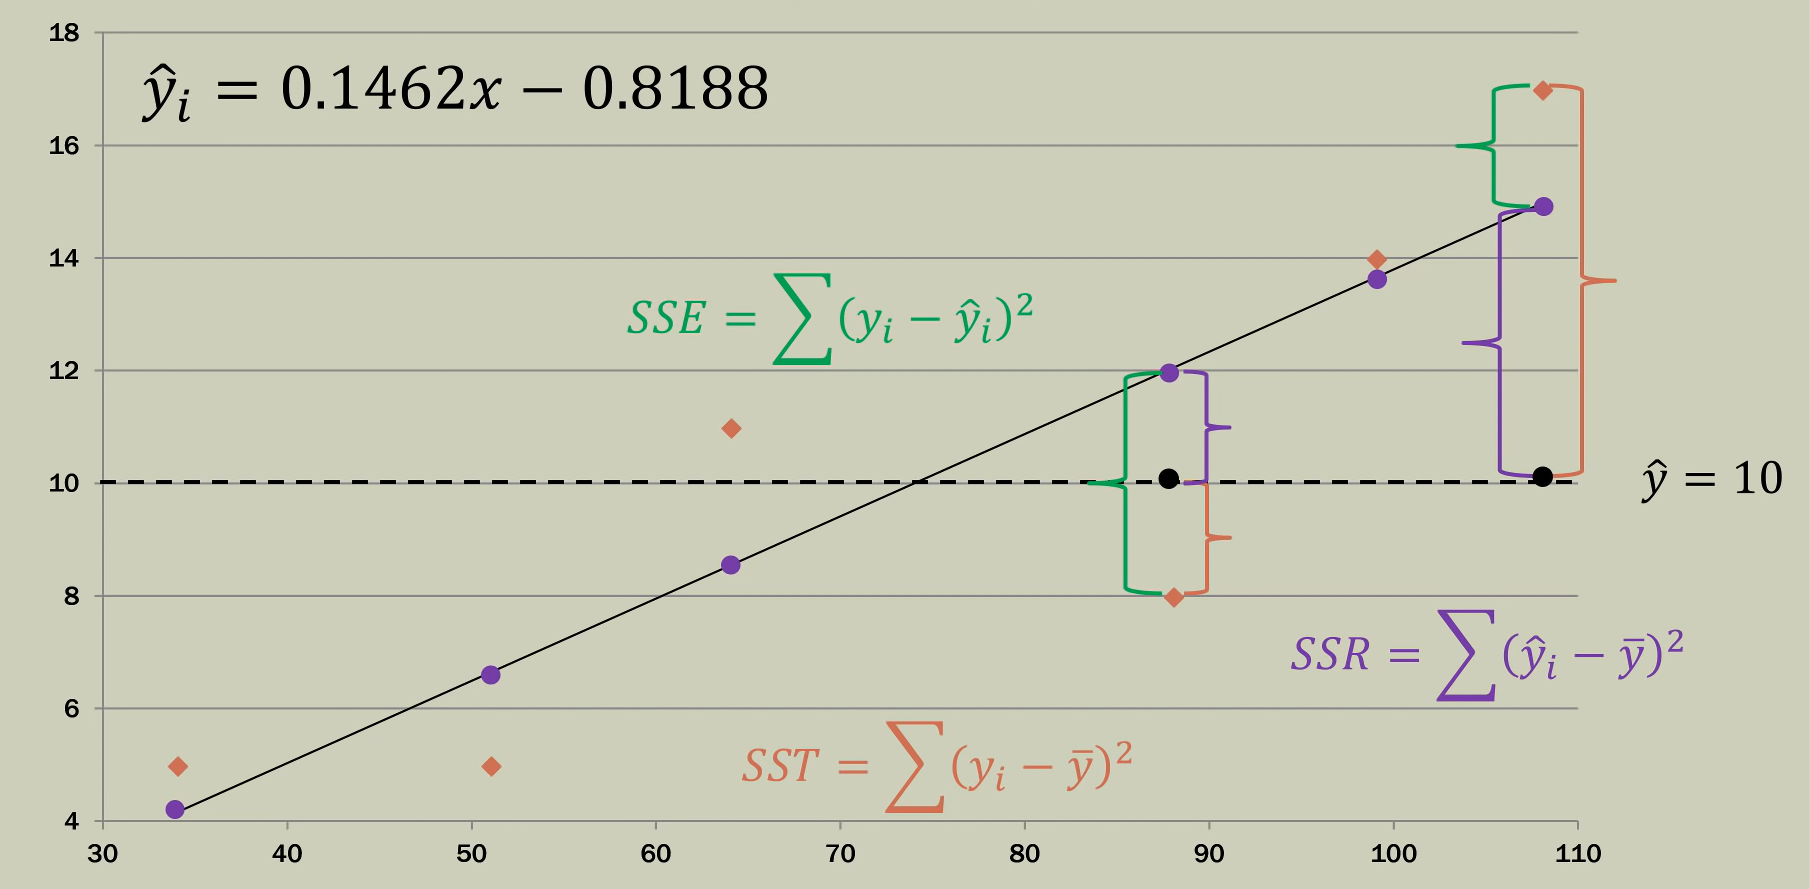


## Method 2:Mean Squared Error (MSE)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models 

* For tuning parameters via a grid search and cross-validation


* sum of all Actual - predicted whole squared by total no of observation

In [123]:
from sklearn.metrics import mean_squared_error

In [124]:
mean_squared_error(y_train, y_train_pred)   # for training data set

2.467980650845732

In [125]:
mean_squared_error(y_test, y_test_pred)      # foor testing data set

5.68849934540238

## Method 3: Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

* 1- Meaning how much it can be explained with the model here its 98%
* 0- Its is unexplainable

In [126]:
from sklearn.metrics import r2_score

In [127]:
r2_score(y_train, y_train_pred)

0.8597455183618172

In [128]:
r2_score(y_test, y_test_pred)

0.7963194590331051

# Error in RANSAC model

In [129]:
ransac=RANSACRegressor()

In [130]:
ransac.fit(X_train,y_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [131]:
inlier_mask=ransac.inlier_mask_

In [132]:
y_train_pred=ransac.predict(X_train[inlier_mask])

In [133]:
y_test_pred=ransac.predict(X_test)

(-25, 15)

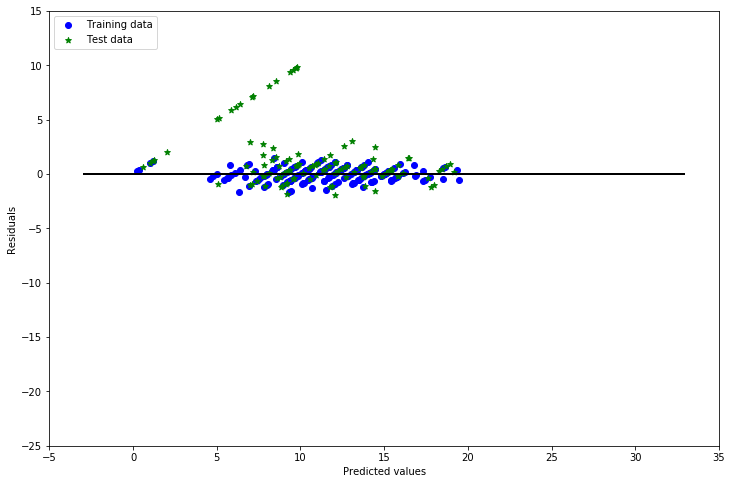

In [134]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred,y_train_pred - y_train[inlier_mask], c='blue',marker='o',label='Training data')
plt.scatter(y_test_pred,y_test_pred - y_test, c='green',marker='*',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-3,xmax=33,colors='k',lw=2)
plt.xlim([-5,35])
plt.ylim([-25,15])

## Method 2:Mean Squared Error (MSE)

In [135]:
mean_squared_error(y_train[inlier_mask], y_train_pred)

0.36953764585780563

In [136]:
mean_squared_error(y_test, y_test_pred)

8.337027211304123

## Method 3: Coefficient of Determination, $R^2$

In [137]:
r2_score(y_train[inlier_mask], y_train_pred)

0.969718540615942

In [138]:
r2_score(y_test, y_test_pred)

0.7014871393407831

## Descision Tree

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [140]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [141]:
# Create decision tree classifer object
clf = DecisionTreeClassifier(random_state=0)

# Train model
model = clf.fit(X, y)

In [142]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

ModuleNotFoundError: No module named 'pydotplus'

In [143]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names)




In [144]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

NameError: name 'pydotplus' is not defined

In [145]:

# Show graph
graph

NameError: name 'graph' is not defined